## e-Commerce Payment Installment Prediction Using Logistic Regression

This project will analyse Olist customer purchase data. *Olist* is a Brazilian e-commerce company that provided many products for its customer ranging from clothing to electronics. Olist main business model is to partner with brands and manufacturer to then sell the products within the e-commerce platform. The dataset provided by Olist and obtained from [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce).

**Project Goal :**
As an e-commerce company, Olist did not producing their own products, therefore the company main value proposition is deeply related with how good their e-commerce website and marketing strategy. The goal of this project is to analyse the relationship between payment installment and customer willingness to purchase more expensive products.

In [77]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Import Dataset
data = pd.read_csv('Olist_Data.csv', ';', header=0)

In [102]:
data

,payment_installments,price,price_binary
0,5,217.91,1
1,1,39.99,0
2,5,349.90,1
3,3,19.00,0
4,1,72.99,0
...,...,...,...
117596,3,49.90,0
117597,1,16.00,0
117598,4,219.00,1
117599,1,99.00,0


This dataset consists of 177,601 rows of customer purchase with the features of the product price and payment installments. The price data on this analysis is also converted into binary format. This is needed since logistic regression need a categorical data to function properly. Product price variable binary format is the average price from 177,601 cases on this dataset and resulting in the amount of R$ 120.8. The category if price higher that the average with number is coded as 1 and lower than that is 0.

In [80]:
data['price_binary'].value_counts()

0    84171
1    33430
Name: price_binary, dtype: int64

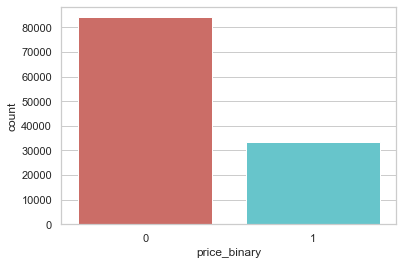

<Figure size 432x288 with 0 Axes>

In [81]:
sns.countplot(x='price_binary',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [82]:
data.groupby('price_binary').mean()

,payment_installments,price
price_binary,,
0,2.453125,57.631398
1,4.164044,279.934877


**Inference:** Customers who bought more expensive products tends to use a longer payment installments option with an average of 4.1 time installments compared to the more lower priced products with 2.45 time installments.

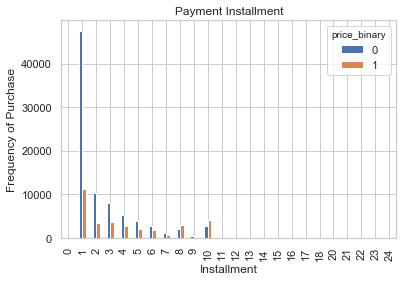

In [83]:
%matplotlib inline
pd.crosstab(data.payment_installments,data.price_binary).plot(kind='bar')
plt.title('Payment Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency of Purchase')
plt.savefig('pay_ins')

**Inference:** One-time Payment dominated by lower priced products, 2-7 payment installments still have more lower priced products but with decreasing frequency. Starting from 8 installments it can be seen more frequency of people who buy more expensive products. This is an interesting phenomenon because payment instalment can offer more flexibility for the customer to spread their purchase over several payment and also an opportunity for the company to attract customer to spend more.

In [84]:
data.payment_installments = data.payment_installments.astype('int64')

In [85]:
X = data['payment_installments'].values 
y = data['price_binary'].values

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
X_train

array([ 2,  1,  3, ...,  1,  5, 10], dtype=int64)

In [88]:
y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [89]:
X_train.reshape(-1, 1)

array([[ 2],
       [ 1],
       [ 3],
       ...,
       [ 1],
       [ 5],
       [10]], dtype=int64)

In [90]:
y_train.reshape(-1, 1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [91]:
X_test.reshape(-1, 1)

array([[4],
       [4],
       [3],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [92]:
y_test.reshape(-1, 1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [93]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred = logreg.predict(X_test.reshape(-1, 1))

In [96]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))))

Accuracy of logistic regression classifier on test set: 0.74


In [97]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train.reshape(-1, 1), y_train.reshape(-1, 1), cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.735


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[15828  1005]
 [ 5162  1526]]


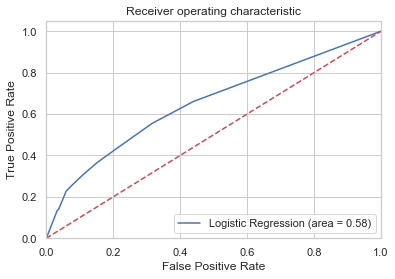

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.reshape(-1, 1)))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.reshape(-1, 1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()